# Limpeza

In [46]:
import pandas as pd
import inflection
import plotly.express as px

In [47]:
df = pd.read_csv('zomato.csv')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,Botswana Pula(P),1,0,0,0,3,4.6,3F7E00,Excellent,619
1,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,Botswana Pula(P),1,0,0,0,3,4.6,3F7E00,Excellent,619


In [48]:
COUNTRIES = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zeland",
    162: "Philippines",
    166: "Qatar",
    184: "Singapure",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "United Arab Emirates",
    215: "England",
    216: "United States of America",
    }
def country_name(country_id):
    return COUNTRIES[country_id]

In [49]:
df['country_name'] = df.loc[:, 'Country Code'].apply(lambda x: country_name (x))

In [50]:
def create_price_tye(price_range):
    if price_range == 1:
        return "cheap"
    elif price_range == 2:
        return "normal"
    elif price_range == 3:
        return "expensive"
    else:
        return "gourmet"

In [51]:
df['price_range_name'] = df.loc[:, 'Price range'].apply(lambda x: create_price_tye (x))

In [52]:
COLORS = {
"3F7E00": "darkgreen",
"5BA829": "green",
"9ACD32": "lightgreen",
"CDD614": "orange",
"FFBA00": "red",
"CBCBC8": "darkred",
"FF7800": "darkred",
}
def color_name(color_code):
    return COLORS[color_code]


In [53]:
df['color_name'] = df.loc[:, 'Rating color'].apply(lambda x: color_name (x))

In [54]:
def rename_columns(dataframe):
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df

In [55]:
df= rename_columns(df)

In [56]:
df["cuisines"]=df["cuisines"].fillna("")

In [57]:
df["cuisines"] = df.loc[:, "cuisines"].apply(lambda x: x.split(",")[0])

In [58]:
df_new = df.loc[:, ['restaurant_id', 'restaurant_name', 'city', 'address', 'currency',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'aggregate_rating', 'rating_text',
       'votes', 'country_name', 'price_range_name', 'color_name']]

In [59]:
df_new.head(2)

,restaurant_id,restaurant_name,city,address,currency,locality,locality_verbose,longitude,latitude,cuisines,...,currency,has_table_booking,has_online_delivery,is_delivering_now,aggregate_rating,rating_text,votes,country_name,price_range_name,color_name
0,6310675,Mama Lou's Italian Kitchen,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",Botswana Pula(P),BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,Botswana Pula(P),1,0,0,4.6,Excellent,619,Philippines,expensive,darkgreen
1,6310675,Mama Lou's Italian Kitchen,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",Botswana Pula(P),BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,Botswana Pula(P),1,0,0,4.6,Excellent,619,Philippines,expensive,darkgreen


In [60]:
df_new.describe()

,restaurant_id,longitude,latitude,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,aggregate_rating,votes
count,7.527000e+03,7527.000000,7527.000000,7.527000e+03,7527.000000,7527.000000,7527.000000,7527.000000,7527.000000
mean,1.055689e+07,33.764092,19.332787,7.152113e+03,0.062176,0.352464,0.174306,4.118055,616.401488
std,7.075141e+06,77.395241,23.255979,2.906068e+05,0.241491,0.477769,0.379397,0.680191,1127.697932
min,5.490000e+02,-122.700455,-41.330428,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500060e+06,-4.258142,12.923378,6.000000e+01,0.000000,0.000000,0.000000,4.000000,152.000000
50%,7.701457e+06,73.785121,25.246955,2.900000e+02,0.000000,0.000000,0.000000,4.200000,335.000000
75%,1.714715e+07,79.833706,31.636552,6.000000e+02,0.000000,1.000000,0.000000,4.500000,663.000000
max,1.904028e+07,175.310552,55.976980,2.500002e+07,1.000000,1.000000,1.000000,4.900000,41333.000000


In [61]:
df_new = df_new.dropna(axis=0)

In [62]:
df_new = df_new.drop_duplicates()

In [63]:
df_new = df_new.loc[df_new.average_cost_for_two!=0,:]

# Geral

1. Quantos restaurantes únicos estão registrados?


In [64]:
df_new.loc[:, 'restaurant_name'].nunique()


5865

2. Quantos países únicos estão registrados?


In [65]:
df_new.loc[:, 'country_name'].nunique()


15

3. Quantas cidades únicas estão registradas?


In [66]:
df_new.loc[:, 'city'].nunique()


125

4. Qual o total de avaliações feitas?


In [67]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'country_name', 'price_range_name', 'color_name'],
      dtype='object')

In [68]:
df.currency.head(2)

0    Botswana Pula(P)
1    Botswana Pula(P)
Name: currency, dtype: object

In [69]:
df_aux = df_new.loc[:,['restaurant_id', 'cuisines', 'currency', 'restaurant_name',  'aggregate_rating', 'city', 'country_name', 'average_cost_for_two']].drop_duplicates().sort_values(by=['aggregate_rating', 'restaurant_id', 'restaurant_name'], ascending=False)

In [70]:
df_aux.currency.iloc[0]

currency    Indian Rupees(Rs.)
currency    Indian Rupees(Rs.)
Name: 3245, dtype: object

In [71]:
df_aux= df_new.loc[:,['restaurant_name','votes']].drop_duplicates()
df_aux.votes.sum()

4185448

5. Qual o total de tipos de culinária registrados?


In [72]:
df_new.loc[:, 'cuisines'].nunique()


165

# País

## 1. Qual o nome do país que possui mais cidades registradas?

## 2. Qual o nome do país que possui mais restaurantes registrados?

In [73]:
df_aux = df_new.loc[:,['country_name', 'restaurant_name']].drop_duplicates().groupby(by='country_name').count().sort_values(by='restaurant_name', ascending=False).reset_index()

In [74]:
df_aux.head()

,country_name,restaurant_name
0,India,2483
1,United States of America,1267
2,England,363
3,South Africa,302
4,United Arab Emirates,242


In [75]:
df_aux = df_aux.rename(columns={'country_name': "Paises", 'restaurant_name':'Quantidade de Restaurantes'})

In [76]:
df_aux.head()

,Paises,Quantidade de Restaurantes
0,India,2483
1,United States of America,1267
2,England,363
3,South Africa,302
4,United Arab Emirates,242


In [77]:
fig = px.bar(df_aux, x='Paises', y='Quantidade de Restaurantes', text_auto=True, title='Quantidade de Restaurantes registrados por País')

In [78]:
fig.update_layout(title_x=0.3)

In [79]:
df_new.price_range_name.unique()

array(['expensive', 'gourmet', 'normal', 'cheap'], dtype=object)

## 3. Qual o nome do país que possui mais restaurantes com o nível de preço igual a 4
registrados?

In [80]:
df_new.columns

Index(['restaurant_id', 'restaurant_name', 'city', 'address', 'currency',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'aggregate_rating',
       'rating_text', 'votes', 'country_name', 'price_range_name',
       'color_name'],
      dtype='object')

In [81]:
df_rest_four = df_new.loc[df_new.price_range_name=='gourmet',:]


In [82]:
dic  = {}
for i in range (df_rest_four.country_name.nunique()):
    dic[df.country_name.unique()[i]]= (df_rest_four.loc[df.country_name==df.country_name.unique()[i], 'restaurant_name'].nunique())

dic

{'Philippines': 17,
 'Brazil': 141,
 'Australia': 32,
 'United States of America': 392,
 'Canada': 53,
 'Singapure': 58,
 'United Arab Emirates': 87,
 'India': 171,
 'Indonesia': 13,
 'New Zeland': 78,
 'England': 75,
 'Qatar': 42,
 'South Africa': 195,
 'Sri Lanka': 16,
 'Turkey': 53}

In [83]:
df_aux = pd.DataFrame.from_dict(dic, orient ='index').reset_index()
df_aux

,index,0
0,Philippines,17
1,Brazil,141
2,Australia,32
3,United States of America,392
4,Canada,53
5,Singapure,58
6,United Arab Emirates,87
7,India,171
8,Indonesia,13
9,New Zeland,78


In [84]:
df_aux = df_aux.rename(columns={0: "number_of_restaurantes_gourmet", 'index':'country'}).sort_values(by='number_of_restaurantes_gourmet', ascending=False)


In [85]:
px.bar(df_aux, x='country', y='number_of_restaurantes_gourmet', text_auto=True)

## 4. Qual o nome do país que possui a maior quantidade de tipos de culinária distintos?

In [86]:
df_new.country_name.unique()

array(['Philippines', 'Brazil', 'Australia', 'United States of America',
       'Canada', 'Singapure', 'United Arab Emirates', 'India',
       'Indonesia', 'New Zeland', 'England', 'Qatar', 'South Africa',
       'Sri Lanka', 'Turkey'], dtype=object)

In [87]:
df_new.country_name.nunique()

15

In [88]:
dic  = {}
for i in range (df_new.country_name.nunique()):
    dic[df.country_name.unique()[i]]= (df_new.loc[df.country_name==df.country_name.unique()[i], 'cuisines'].nunique())

dic

{'Philippines': 14,
 'Brazil': 42,
 'Australia': 42,
 'United States of America': 74,
 'Canada': 42,
 'Singapure': 21,
 'United Arab Emirates': 46,
 'India': 78,
 'Indonesia': 21,
 'New Zeland': 37,
 'England': 52,
 'Qatar': 31,
 'South Africa': 42,
 'Sri Lanka': 25,
 'Turkey': 28}

In [89]:
df_aux = pd.DataFrame.from_dict(dic, orient ='index').reset_index()
df_aux

,index,0
0,Philippines,14
1,Brazil,42
2,Australia,42
3,United States of America,74
4,Canada,42
5,Singapure,21
6,United Arab Emirates,46
7,India,78
8,Indonesia,21
9,New Zeland,37


In [90]:
df_aux = df_aux.rename(columns={0: "number_of_cuisines", 'index':'country'}).sort_values(by='number', ascending=False)


KeyError: 'number'

In [ ]:
px.bar(df_aux, x='country', y='number', text_auto=True)

## 5. Qual o nome do país que possui a maior quantidade de avaliações feitas?


In [ ]:
dic  = {}
list= []
for i in range (df_new.country_name.nunique()):
    df_aux = df_new.loc[df_new.country_name==df_new.country_name.unique()[i],['restaurant_name','votes']].groupby(by='votes').sum().reset_index()
    list.append(df_aux.votes.sum())
    dic[df.country_name.unique()[i]]=list[i]

dic

{'Philippines': 45858,
 'Brazil': 1229,
 'Australia': 125619,
 'United States of America': 307730,
 'Canada': 94879,
 'Singapure': 1025,
 'United Arab Emirates': 165869,
 'India': 2151497,
 'Indonesia': 87333,
 'New Zeland': 46675,
 'England': 30648,
 'Qatar': 27753,
 'South Africa': 65815,
 'Sri Lanka': 10382,
 'Turkey': 92952}

In [ ]:
df_aux = pd.DataFrame.from_dict(dic, orient ='index').reset_index()
df_aux

,index,0
0,Philippines,45858
1,Brazil,1229
2,Australia,125619
3,United States of America,307730
4,Canada,94879
5,Singapure,1025
6,United Arab Emirates,165869
7,India,2151497
8,Indonesia,87333
9,New Zeland,46675


In [ ]:
df_aux = df_aux.rename(columns={0: "number_of_votes", 'index':'country'}).sort_values(by='number_of_votes', ascending=False)


In [ ]:
px.bar(df_aux, x='country', y='number_of_votes', text_auto=True)

## 6. Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?

In [ ]:
df_delivery = df_new.loc[df_new.has_online_delivery==1,:]

In [ ]:
dic  = {}
list= []
for i in range (df_delivery.country_name.nunique()):
    df_aux = df_delivery.loc[df_delivery.country_name==df_delivery.country_name.unique()[i],:]
    list.append(df_aux.restaurant_name.nunique())
    dic[df_delivery.country_name.unique()[i]]=list[i]
dic

{'Philippines': 9, 'United Arab Emirates': 160, 'India': 1793, 'Qatar': 33}

In [ ]:
df_aux = pd.DataFrame.from_dict(dic, orient ='index').reset_index()
df_aux

,index,0
0,Philippines,9
1,United Arab Emirates,160
2,India,1793
3,Qatar,33


In [ ]:
df_aux = df_aux.rename(columns={0: "number_restaurants_delivery_online", 'index':'country'}).sort_values(by='number_restaurants_delivery_online', ascending=False)

px.bar(df_aux, x='country', y='number_restaurants_delivery_online', text_auto=True)

## 7. Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?

In [ ]:
df_new.columns

Index(['restaurant_name', 'city', 'address', 'locality', 'locality_verbose',
       'longitude', 'latitude', 'cuisines', 'average_cost_for_two', 'currency',
       'has_table_booking', 'has_online_delivery', 'is_delivering_now',
       'aggregate_rating', 'rating_text', 'votes', 'country_name',
       'price_range_name', 'color_name', 'quantily'],
      dtype='object')

In [ ]:
df_booking = df_new.loc[df_new.has_table_booking==1, :]

In [ ]:
dic  = {}
list= []
for i in range (df_booking.country_name.nunique()):
    df_aux = df_booking.loc[df_booking.country_name==df_booking.country_name.unique()[i],:]
    list.append(df_aux.restaurant_name.nunique())
    dic[df_booking.country_name.unique()[i]]=list[i]
dic

{'Philippines': 15,
 'Australia': 29,
 'United States of America': 2,
 'United Arab Emirates': 9,
 'India': 198,
 'Indonesia': 13,
 'New Zeland': 19,
 'England': 51,
 'Qatar': 4,
 'South Africa': 3,
 'Sri Lanka': 1,
 'Turkey': 4}

In [ ]:
df_aux = pd.DataFrame.from_dict(dic, orient ='index').reset_index()
df_aux

,index,0
0,Philippines,15
1,Australia,29
2,United States of America,2
3,United Arab Emirates,9
4,India,198
5,Indonesia,13
6,New Zeland,19
7,England,51
8,Qatar,4
9,South Africa,3


In [ ]:
df_aux = df_aux.rename(columns={0: "number_rest_has_table_booking", 'index':'country'})

In [ ]:
df_aux = df_aux.sort_values(by='number_rest_has_table_booking', ascending=False)


In [ ]:
px.bar(df_aux, x='country', y='number_rest_has_table_booking', text_auto=True)

## 8. Qual o nome do país que possui, na média, a maior quantidade de avaliações registrada?

In [ ]:
df_new.columns

Index(['restaurant_name', 'city', 'address', 'locality', 'locality_verbose',
       'longitude', 'latitude', 'cuisines', 'average_cost_for_two', 'currency',
       'has_table_booking', 'has_online_delivery', 'is_delivering_now',
       'aggregate_rating', 'rating_text', 'votes', 'country_name',
       'price_range_name', 'color_name', 'quantily'],
      dtype='object')

In [ ]:
df_aux = df_new.loc[:,['country_name','votes']].groupby(by='country_name').mean().sort_values(by='votes', ascending=False).reset_index()

In [ ]:
df_aux

,country_name,votes
0,Indonesia,1115.317073
1,India,905.361848
2,Australia,724.205556
3,Turkey,643.103030
4,United Arab Emirates,614.296407
5,Philippines,600.284091
6,Canada,583.433333
7,United States of America,381.463082
8,Qatar,374.904255
9,South Africa,236.023560


In [ ]:
px.bar(df_aux, x='country_name', y='votes', text_auto=True)

## 9. Qual o nome do país que possui, na média, a maior nota média registrada?


In [ ]:
df_aux = df_new.loc[:,['country_name','aggregate_rating']].groupby(by='country_name').mean().sort_values(by='aggregate_rating', ascending=False).reset_index()

In [ ]:
px.bar(df_aux, x='country_name', y='aggregate_rating', text_auto=True)

## 10. Qual o nome do país que possui, na média, a menor nota média registrada?


In [ ]:
df_aux = df_new.loc[:,['country_name','aggregate_rating']].groupby(by='country_name').mean().sort_values(by='aggregate_rating', ascending=True).reset_index()

In [ ]:
px.bar(df_aux, x='country_name', y='aggregate_rating', text_auto=True)

## 11. Qual a média de preço de um prato para dois por país?


In [ ]:
df_new.head(2)

,restaurant_name,city,address,locality,locality_verbose,longitude,latitude,cuisines,average_cost_for_two,currency,has_table_booking,has_online_delivery,is_delivering_now,aggregate_rating,rating_text,votes,country_name,price_range_name,color_name,quantily
0,Mama Lou's Italian Kitchen,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,1100,Botswana Pula(P),1,0,0,4.6,Excellent,619,Philippines,expensive,darkgreen,0
1,Mama Lou's Italian Kitchen,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,1100,Botswana Pula(P),1,0,0,4.6,Excellent,619,Philippines,expensive,darkgreen,0


In [ ]:
df_aux = df_new.loc[:,['country_name','average_cost_for_two']].groupby(by='country_name').mean().sort_values(by='average_cost_for_two', ascending=False).reset_index()

In [ ]:
df_aux

,country_name,average_cost_for_two
0,Indonesia,312682.926829
1,Australia,138959.783333
2,Sri Lanka,2607.471264
3,Philippines,1211.090909
4,India,702.303964
5,South Africa,335.479058
6,Qatar,176.648936
7,United Arab Emirates,158.218563
8,Singapure,141.036585
9,Brazil,137.375479


# Cidade

## 1. Qual o nome da cidade que possui mais restaurantes registrados?


In [ ]:
df_aux= df_new.loc[:, ['city', 'restaurant_name']].drop_duplicates().groupby(by='city').count().reset_index().sort_values(by='restaurant_name', ascending=False)

In [ ]:
df_aux

,city,country_name,restaurant_name
110,Singapore,80,80
28,Dallas,79,79
8,Auckland,79,79
41,Glasgow,78,78
66,Mangalore,77,77
...,...,...,...
100,Roodepoort,1,1
74,Muntinlupa City,1,1
38,Gandhinagar,1,1
123,Zirakpur,1,1


In [ ]:
df_aux.iloc[0,0]

'Edinburgh'

## 2. Qual o nome da cidade que possui mais restaurantes com nota média acima de 4?

In [ ]:
df_new.aggregate_rating.unique()

array([4.6, 4.7, 4.4, 4. , 4.3, 4.1, 4.5, 4.2, 4.9, 3.9, 4.8, 3.2, 3.3,
       2.5, 3.1, 3.8, 3.6, 3.7, 3.5, 0. , 2.8, 2.7, 3.4, 2.9, 2.4, 2.3,
       2.6, 3. , 2.2, 2.1])

In [ ]:
df_aux= df_new.loc[df_new.aggregate_rating>4, ['country_name','city', 'restaurant_name']].drop_duplicates().groupby(by=['city','country_name']).count().reset_index().sort_values(by='restaurant_name', ascending=False)
df_aux=df_aux.iloc[0:7,:]
df_aux

,city,country_name,restaurant_name
8,Auckland,New Zeland,72
56,London,England,71
43,Houston,United States of America,68
120,İstanbul,Turkey,66
53,Kolkata,India,64
106,Singapore,Singapure,63
27,Dallas,United States of America,62


In [ ]:
df_aux

,city,restaurant_name
43,Houston,72
8,Auckland,72
56,London,71
120,İstanbul,66
53,Kolkata,64
...,...,...
75,Nasik,1
37,Ghaziabad,1
54,Las Piñas City,1
119,Zirakpur,1


In [ ]:
df_aux.iloc[0,0]

'Houston'

## 3. Qual o nome da cidade que possui mais restaurantes com nota média abaixo de 2.5?

In [ ]:
df_aux= df_new.loc[df_new.aggregate_rating<2.5, ['city', 'restaurant_name']].drop_duplicates().groupby(by='city').count().reset_index().sort_values(by='restaurant_name', ascending=False)

In [ ]:
df_aux

,city,restaurant_name
6,Gangtok,40
10,Ooty,19
16,São Paulo,16
1,Brasília,15
14,Rio de Janeiro,12
8,Manchester,7
2,Clarens,4
15,Shimla,4
5,Edinburgh,2
7,Hamilton,2


In [ ]:
df_aux.iloc[0,0]

'Gangtok'

## 4. Qual o nome da cidade que possui o maior valor médio de um prato para dois?


In [ ]:
df_new.columns

Index(['restaurant_name', 'city', 'address', 'locality', 'locality_verbose',
       'longitude', 'latitude', 'cuisines', 'average_cost_for_two', 'currency',
       'has_table_booking', 'has_online_delivery', 'is_delivering_now',
       'aggregate_rating', 'rating_text', 'votes', 'country_name',
       'price_range_name', 'color_name'],
      dtype='object')

In [ ]:
df_aux= df_new.loc[:, ['city', 'restaurant_name', 'average_cost_for_two']].drop_duplicates()
df_aux= df_new.loc[:, ['city', 'average_cost_for_two']].groupby(by='city').mean().reset_index().sort_values(by='average_cost_for_two', ascending=False)

In [ ]:
df_aux

,city,average_cost_for_two
1,Adelaide,416734.133333
51,Jakarta,319615.384615
115,Tangerang,180000.000000
15,Bogor,175000.000000
86,Pasay City,4000.000000
...,...,...
19,Calgary,32.500000
60,Los Angeles,30.666667
30,Denver,29.916667
91,Phoenix,28.000000


In [ ]:
df_aux.iloc[0,0]

'Adelaide'

## 5. Qual o nome da cidade que possui a maior quantidade de tipos de culinária distintas?

In [ ]:
df_new.cuisines.unique()

array(['Italian', 'European', 'Filipino', 'American', 'Korean', 'Pizza',
       'Taiwanese', 'Japanese', 'Coffee', 'Chinese', 'Seafood',
       'Singaporean', 'Vietnamese', 'Latin American', 'Healthy Food',
       'Cafe', 'Fast Food', 'Brazilian', 'Argentine', 'Arabian', 'Bakery',
       'Tex-Mex', 'Bar Food', 'International', 'French', 'Steak',
       'German', 'Sushi', 'Grill', 'Peruvian', 'North Eastern',
       'Ice Cream', 'Burger', 'Mexican', 'Vegetarian', 'Contemporary',
       'Desserts', 'Juices', 'Beverages', 'Spanish', 'Thai', 'Indian',
       'BBQ', 'Mongolian', 'Portuguese', 'Greek', 'Asian', 'Author',
       'Gourmet Fast Food', 'Lebanese', 'Modern Australian', 'African',
       'Coffee and Tea', 'Australian', 'Middle Eastern', 'Malaysian',
       'Tapas', 'New American', 'Pub Food', 'Southern', 'Diner', 'Donuts',
       'Southwestern', 'Sandwich', 'Irish', 'Mediterranean', 'Cafe Food',
       'Korean BBQ', 'Fusion', 'Canadian', 'Breakfast', 'Cajun',
       'New Mexican',

In [ ]:
df_aux= df_new.loc[:, ['city', 'cuisines']].drop_duplicates().groupby(by='city').count().reset_index().sort_values(by='cuisines', ascending=False)

In [ ]:
df_aux

,city,cuisines
14,Birmingham,32
32,Doha,31
72,Montreal,30
112,São Paulo,30
64,Manchester,30
...,...,...
57,Las Piñas City,1
68,Marikina City,1
100,Roodepoort,1
74,Muntinlupa City,1


In [ ]:
df_aux.iloc[0,0]

'Birmingham'

## 6. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem reservas?

In [ ]:
df_new.columns

Index(['restaurant_name', 'city', 'address', 'locality', 'locality_verbose',
       'longitude', 'latitude', 'cuisines', 'average_cost_for_two', 'currency',
       'has_table_booking', 'has_online_delivery', 'is_delivering_now',
       'aggregate_rating', 'rating_text', 'votes', 'country_name',
       'price_range_name', 'color_name'],
      dtype='object')

In [ ]:
df_aux= df_new.loc[df_new.has_table_booking==1, ['city', 'restaurant_name']].drop_duplicates().groupby(by='city').count().reset_index().sort_values(by='restaurant_name', ascending=False)

In [ ]:
df_aux

,city,restaurant_name
8,Bangalore,32
16,Chennai,23
55,Pune,22
13,Brisbane,17
6,Auckland,17
...,...,...
51,Pasig City,1
23,Fujairah,1
47,Nashik,1
33,Johannesburg,1


In [ ]:
df_aux.iloc[0,0]

'Bangalore'

## 7. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem entregas?

In [ ]:
df_new.columns

Index(['restaurant_name', 'city', 'address', 'locality', 'locality_verbose',
       'longitude', 'latitude', 'cuisines', 'average_cost_for_two', 'currency',
       'has_table_booking', 'has_online_delivery', 'is_delivering_now',
       'aggregate_rating', 'rating_text', 'votes', 'country_name',
       'price_range_name', 'color_name'],
      dtype='object')

In [ ]:
df_aux= df_new.loc[df_new.is_delivering_now==1, ['city', 'restaurant_name']].drop_duplicates().groupby(by='city').count().reset_index().sort_values(by='restaurant_name', ascending=False)

In [ ]:
df_aux

,city,restaurant_name
5,Aurangabad,46
4,Amritsar,45
12,Dehradun,44
48,Vadodara,43
26,Ludhiana,41
42,Ranchi,40
49,Varanasi,39
25,Lucknow,37
2,Ahmedabad,37
21,Jaipur,36


In [ ]:
df_aux.iloc[0,0]

'Aurangabad'

## 8. Qual o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online?

In [ ]:
df_aux= df_new.loc[df_new.has_online_delivery==1, ['city', 'restaurant_name']].drop_duplicates().groupby(by='city').count().reset_index().sort_values(by='restaurant_name', ascending=False)

In [ ]:
df_aux.iloc[0,0]

'Aurangabad'

# Restaurantes

## 1. Qual o nome do restaurante que possui a maior quantidade de avaliações?


In [ ]:
df_aux=df_new.loc[:,['restaurant_name', 'votes']].drop_duplicates().sort_values(by='votes', ascending=False)
df_aux.head()

,restaurant_name,votes
3928,Bawarchi,41333
3038,Byg Brewski Brewing Company,17394
2986,Toit,15270
3002,Truffles,14984
5076,Hauz Khas Social,13627


In [ ]:
df_aux.iloc[0,0]

'Bawarchi'

## 2. Qual o nome do restaurante com a maior nota média?


In [ ]:
df_new.columns

Index(['restaurant_id', 'restaurant_name', 'city', 'address', 'locality',
       'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'aggregate_rating',
       'rating_text', 'votes', 'country_name', 'price_range_name',
       'color_name'],
      dtype='object')

In [ ]:
df_aux=df_new.loc[:,['restaurant_id', 'restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating', 'restaurant_id'], ascending=False)
df_aux.head()

,restaurant_id,restaurant_name,aggregate_rating
3245,18972215,Baithak,4.9
3337,18938720,Coal Barbecues,4.9
4726,18938127,Angrezi Dhaba,4.9
4035,18903417,Chool,4.9
6061,18885812,Sushi Go!,4.9


In [ ]:
df_aux.iloc[0,1]

'Baithak'

## 3. Qual o nome do restaurante que possui o maior valor de uma prato para duas pessoas?

In [ ]:
df_aux=df_new.loc[:,['restaurant_name', 'average_cost_for_two']].drop_duplicates().sort_values(by='average_cost_for_two', ascending=False)
df_aux.head()

,restaurant_name,average_cost_for_two
385,d'Arry's Verandah Restaurant,25000017
6049,The Café - Hotel Mulia,1200000
6086,GIA Restaurant & Bar,700000
6044,SKYE,600000
6056,Shabu-Shabu Shaburi,600000


In [ ]:
df_aux.iloc[0,0]

"d'Arry's Verandah Restaurant"

## 4. Qual o nome do restaurante de tipo de culinária brasileira que possui a menor média de avaliação?

In [ ]:
df.loc[df_new.country_name=='Brazil',:].head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country_name,price_range_name,color_name
88,6600980,A Tribo,30,Brasília,"SCLN, 105, Bloco B, Loja 59, Asa Norte, Rio de...",Asa Norte,"Asa Norte, Brasília",-47.884333,-15.771167,Healthy Food,...,0,0,4,3.2,CDD614,Average,4,Brazil,gourmet,orange
89,6601114,Caramella,30,Brasília,"SCLN 303, Bloco E, Asa Norte, Brasília",Asa Norte,"Asa Norte, Brasília",-47.886000,-15.780833,Cafe,...,0,0,2,3.3,CDD614,Average,5,Brazil,normal,orange
90,6600681,Chez Michou,30,Brasília,"SCLN, 208, Bloco A, Loja 30, Asa Norte, Brasília",Asa Norte,"Asa Norte, Brasília",-47.881789,-15.764142,Fast Food,...,0,0,2,3.2,CDD614,Average,6,Brazil,normal,orange
91,6601075,Confraria Chico Mineiro,30,Brasília,"SCLN 104, Bloco D, Loja 38, Asa Norte, Brasília",Asa Norte,"Asa Norte, Brasília",-47.883833,-15.777000,Brazilian,...,0,0,3,3.3,CDD614,Average,7,Brazil,expensive,orange
92,6601569,El Negro,30,Brasília,"SCLN 413, Bloco C, Asa Norte, Brasilia",Asa Norte,"Asa Norte, Brasília",-47.887958,-15.760372,Argentine,...,0,0,4,2.5,FFBA00,Average,10,Brazil,gourmet,red


In [ ]:
df_new.columns

Index(['restaurant_id', 'restaurant_name', 'city', 'address', 'locality',
       'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'aggregate_rating',
       'rating_text', 'votes', 'country_name', 'price_range_name',
       'color_name'],
      dtype='object')

In [ ]:
df_aux = df_new.loc[df_new.cuisines=='Brazilian',['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating', 'restaurant_id'], ascending=True)
df_aux.head()

,restaurant_id,restaurant_name,aggregate_rating
126,6600100,Loca Como tu Madre,0.0
105,6600119,Café Savana,0.0
125,6600124,Inácia Poulet Rôti,0.0
151,6600456,Galeteria Beira Lago,0.0
129,6601251,Severina,0.0


In [ ]:
df_aux.iloc[0,1]

'Loca Como tu Madre'

## 5. Qual o nome do restaurante de tipo de culinária brasileira, e que é do Brasil, que possui a maior média de avaliação?

In [ ]:
df_aux = df_new[(df_new.cuisines=='Brazilian') & (df_new.country_name=='Brazil')]


In [ ]:
df_aux = df_aux.loc[:,['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating', 'restaurant_id'], ascending=False)
df_aux.head()

,restaurant_id,restaurant_name,aggregate_rating
254,7302898,Aprazível,4.9
207,7300955,Braseiro da Gávea,4.9
179,7301525,Fogo de Chão,4.8
215,7300515,Garota de Ipanema,4.8
346,6709740,Mocotó,4.8


## 6. Os restaurantes que aceitam pedido online são também, na média, os restaurantes que mais possuem avaliações registradas?

In [ ]:
df_new.columns

Index(['restaurant_id', 'restaurant_name', 'city', 'address', 'locality',
       'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'aggregate_rating',
       'rating_text', 'votes', 'country_name', 'price_range_name',
       'color_name'],
      dtype='object')

In [ ]:
df_has_online_delivery = df_new.loc[:,['has_online_delivery','votes']].drop_duplicates().groupby(by='has_online_delivery').mean()

In [ ]:
df_has_online_delivery

,votes
has_online_delivery,
0,1049.465829
1,1235.125000


<Axes: title={'center': 'Media de avaliações registradas em restaurantes SEM (0) e COM(1) entrega online'}, xlabel='has_online_delivery'>

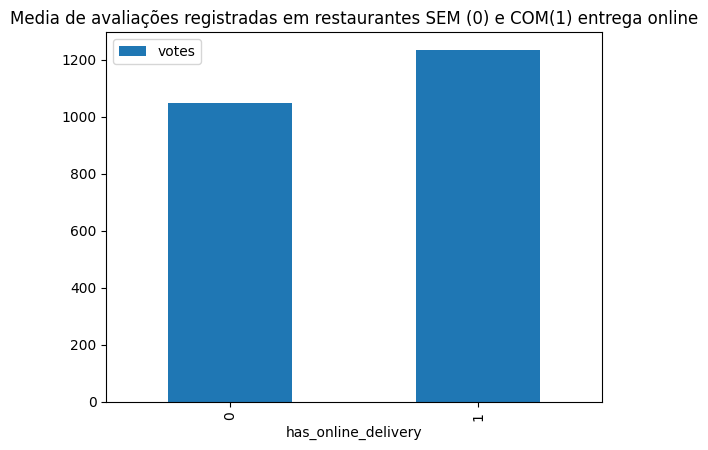

In [ ]:
df_has_online_delivery.plot(kind='bar', title="Media de avaliações registradas em restaurantes SEM (0) e COM(1) entrega online")

## 7. Os restaurantes que fazem reservas são também, na média, os restaurantes que possuem o maior valor médio de um prato para duas pessoas?

In [ ]:
df_has_online_delivery = df_new.loc[:,['has_table_booking','average_cost_for_two']].drop_duplicates().groupby(by='has_table_booking').mean()

In [ ]:
df_has_online_delivery

,average_cost_for_two
has_table_booking,
0,45898.289474
1,380163.633803


<Axes: title={'center': 'Valor médio dos pratos para restaurantes sem e com reserva de mesa'}, xlabel='has_table_booking'>

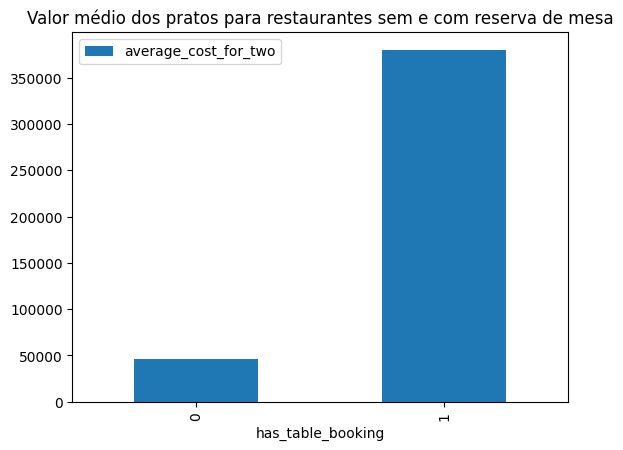

In [ ]:
df_has_online_delivery.plot(kind='bar', title="Valor médio dos pratos para restaurantes sem e com reserva de mesa")

## 8. Os restaurantes do tipo de culinária japonesa dos Estados Unidos da América possuem um valor médio de prato para duas pessoas maior que as churrascarias americanas (BBQ)?

In [ ]:
df_new.columns

Index(['restaurant_id', 'restaurant_name', 'city', 'address', 'locality',
       'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'aggregate_rating',
       'rating_text', 'votes', 'country_name', 'price_range_name',
       'color_name'],
      dtype='object')

In [ ]:
df_new.loc[df_new.country_name=='United States of America', 'cuisines'].unique()

array(['Seafood', 'Mexican', 'American', 'Steak', 'Pizza', 'Italian',
       'Japanese', 'Filipino', 'BBQ', 'Spanish', 'Tapas', 'International',
       'New American', 'Pub Food', 'Burger', 'Southern', 'Bakery',
       'Coffee and Tea', 'European', 'Fast Food', 'Diner', 'Desserts',
       'Tex-Mex', 'Donuts', 'Cafe', 'Sushi', 'French', 'Bar Food',
       'Brazilian', 'Southwestern', 'Thai', 'Sandwich', 'Ice Cream',
       'Asian', 'Chinese', 'Irish', 'Mediterranean', 'Indian',
       'Vietnamese', 'Cajun', 'German', 'Greek', 'Peruvian',
       'New Mexican', 'Belgian', 'Cuban', 'Taco', 'Latin American',
       'Healthy Food', 'Middle Eastern', 'Breakfast', 'Vegetarian',
       'Caribbean', 'Polish', 'Deli', 'Fusion', 'British', 'African', '',
       'California', 'Creole', 'Ramen', 'Ukrainian', 'Malaysian',
       'Hawaiian', 'Pacific Northwest', 'Lebanese', 'Tea', 'Moroccan',
       'Burmese', 'Dim Sum', 'Crepes', 'Fish and Chips', 'Korean',
       'Russian'], dtype=object)

In [ ]:
df_new.country_name.unique()

array(['Philippines', 'Brazil', 'Australia', 'United States of America',
       'Canada', 'Singapure', 'United Arab Emirates', 'India',
       'Indonesia', 'New Zeland', 'England', 'Qatar', 'South Africa',
       'Sri Lanka', 'Turkey'], dtype=object)

In [ ]:
df_aux =df_new.loc[(df_new.cuisines== 'Japanese') | (df_new.cuisines== 'BBQ') & (df_new.country_name=='United States of America'),['cuisines', 'average_cost_for_two']].groupby(by='cuisines').mean()

<Axes: title={'center': 'Valor médio dos pratos para restaurantes dos EUA da culinária Japonesa e BBQ'}, xlabel='cuisines'>

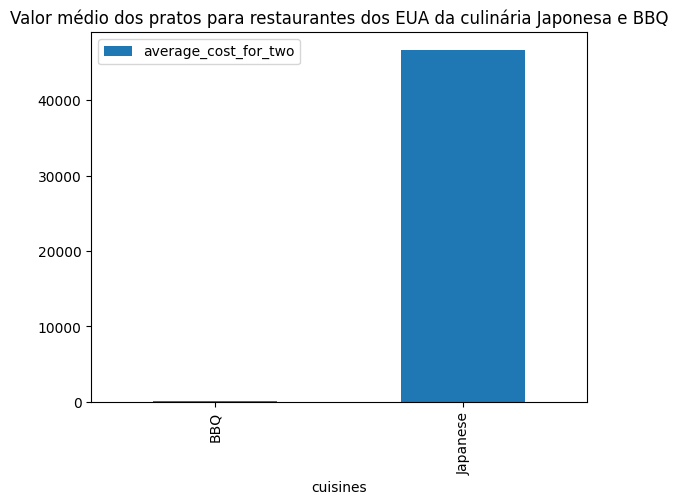

In [ ]:
df_aux.plot(kind='bar', title="Valor médio dos pratos para restaurantes dos EUA da culinária Japonesa e BBQ")

# Tipos de Culinária


## 1. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do  restaurante com a maior média de avaliação?

In [ ]:
df_aux = df_new.loc[df_new.cuisines=='Italian',['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating','restaurant_id'], ascending=False)

In [ ]:
df_aux.iloc[0,1]

'Amano Restaurant'

## 2. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação?

In [ ]:
df_aux = df_new.loc[df_new.cuisines=='Italian',['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating','restaurant_id'], ascending=True)

In [ ]:
df_aux

,restaurant_id,restaurant_name,aggregate_rating
150,6600542,Avenida Paulista,0.0
305,6714499,Ristorantino,0.0
324,6715707,Più,0.0
6723,6800666,Le Delicatezze Di Bruno,0.0
242,7304910,Bene - Sheraton Rio Hotel,0.0
...,...,...,...
1805,17156258,Cerroni's Purple Garlic,4.9
1819,17156955,Guillermo's,4.9
1397,17242351,Central Grocery,4.9
4056,18209498,Zolocrust - Hotel Clarks Amer,4.9


In [ ]:
df_aux.iloc[0,1]

'Avenida Paulista'

## 3. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a maior média de avaliação?

In [ ]:
df_aux = df_new.loc[df_new.cuisines=='American',['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating','restaurant_id'], ascending=False)
df_aux.head()

,restaurant_id,restaurant_name,aggregate_rating
2119,18484349,Cut By Wolfgang Puck,4.9
6853,18416901,The Cheesecake Factory,4.9
1852,17153940,The Magnolia Pancake Haus,4.9
1918,17070293,Kono's Surf Club Cafe,4.9
1911,17069832,Hodad's,4.9


## 4. Qual o nome do restaurante de tipo de culinária brasileira que possui a menor média de avaliação?

In [ ]:
df_aux = df_new.loc[df_new.cuisines=='American',['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating','restaurant_id'], ascending=True)
df_aux.head()


,restaurant_id,restaurant_name,aggregate_rating
7204,18445965,Guy Fieri's Kitchen & Bar,2.2
251,7303748,Bob's,2.6
7261,6502573,Hard Rock Cafe,2.8
6348,7100971,Thunderbird Cafe,3.2
2407,16541324,Chili's,3.3


## 5. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a maior média de avaliação?

In [ ]:
df_aux = df_new.loc[df_new.cuisines=='Arabian',['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating','restaurant_id'], ascending=False)
df_aux.head()

,restaurant_id,restaurant_name,aggregate_rating
3896,18535007,Mandi@36,4.7
3184,18770281,Three Kings,4.5
6883,6200166,Wok of Fame,4.5
2452,5600517,Madfoon Al Khaimah,4.5
2496,5601340,Aroos Damascus,4.4


## 6. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação?

In [ ]:
df_aux = df_new.loc[df_new.cuisines=='Arabian',['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating','restaurant_id'], ascending=True)
df_aux.head()

,restaurant_id,restaurant_name,aggregate_rating
337,6706513,Raful,0.0
169,6601535,Empório Árabe,2.7
147,6600547,Salim Sou Eu,3.1
5155,18698592,V Empire,3.2
5118,18698769,Abad Hot Chicken,3.2


## 7. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a maior média de avaliação?

In [ ]:
df_aux = df_new.loc[df_new.cuisines=='Japanese',['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating','restaurant_id'], ascending=False)
df_aux.head()

,restaurant_id,restaurant_name,aggregate_rating
6061,18885812,Sushi Go!,4.9
6035,18880385,Gyu - Kaku Japanese BBQ,4.9
6034,18793437,Gyu - Kaku Japanese BBQ,4.9
75,18695427,Mendokoro Ramenba,4.9
6106,18615392,WAKI Japanese BBQ Dining,4.9


## 8. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a menor média de avaliação?

In [ ]:
df_aux = df_new.loc[df_new.cuisines=='Japanese',['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating','restaurant_id'], ascending=True)
df_aux.head()

,restaurant_id,restaurant_name,aggregate_rating
123,6600203,Banzai Sushi,0.0
181,7300930,Orienthai,2.4
182,7304077,Hachiko,2.5
112,6600314,Haná,2.7
116,6600379,Sushi Loko,2.9


## 9. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a maior média de avaliação?

In [ ]:
df_aux = df_new.loc[df_new.cuisines=='Home-made',['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating','restaurant_id'], ascending=True)
df_aux.head()

,restaurant_id,restaurant_name,aggregate_rating
7373,6007184,GurMekan Restaurant,3.7
7525,5914190,Kanaat Lokantası,4.0


## 10. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação?

In [ ]:
df_aux = df_new.loc[df_new.cuisines=='Home-made',['restaurant_id','restaurant_name', 'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating','restaurant_id'], ascending=False)
df_aux.head()

,restaurant_id,restaurant_name,aggregate_rating
7525,5914190,Kanaat Lokantası,4.0
7373,6007184,GurMekan Restaurant,3.7


## 11. Qual o tipo de culinária que possui o maior valor médio de um prato para duas pessoas?

In [ ]:
df_new.columns

Index(['restaurant_id', 'restaurant_name', 'city', 'address', 'locality',
       'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'aggregate_rating',
       'rating_text', 'votes', 'country_name', 'price_range_name',
       'color_name'],
      dtype='object')

In [ ]:
df_aux = df_new.loc[:,['cuisines', 'average_cost_for_two']].drop_duplicates().sort_values(by='average_cost_for_two', ascending=False)
df_aux.head()

,cuisines,average_cost_for_two
385,Modern Australian,25000017
6049,Asian,1200000
6086,Italian,700000
6044,Asian,600000
6056,Japanese,600000


## 12. Qual o tipo de culinária que possui a maior nota média?

In [ ]:
df_aux = df_new.loc[:,['restaurant_id', 'cuisines', 'restaurant_name',  'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating', 'restaurant_id', 'restaurant_name'], ascending=False)
df_aux.iloc[0,3]

4.9

In [ ]:
df_aux = df_new.loc[:,['restaurant_id', 'cuisines', 'restaurant_name',  'aggregate_rating', 'city', 'country_name', 'average_cost_for_two']].drop_duplicates().sort_values(by=['aggregate_rating', 'restaurant_id', 'restaurant_name'], ascending=False)
df_aux.head(2)

,restaurant_id,cuisines,restaurant_name,aggregate_rating,city,country_name,average_cost_for_two,currency,currency
3245,18972215,North Indian,Baithak,4.9,Chandigarh,India,800,Indian Rupees(Rs.),Indian Rupees(Rs.)
3337,18938720,North Indian,Coal Barbecues,4.9,Chennai,India,1400,Indian Rupees(Rs.),Indian Rupees(Rs.)


In [ ]:
df_aux.cuisines.iloc[0]

'North Indian'

In [ ]:
df_aux['aggregate_rating']=df_aux['aggregate_rating'].astype(str)
df_aux['restaurant_id']=df_aux['restaurant_id'].astype(str)
df_aux['average_cost_for_two']=df_aux['average_cost_for_two'].astype(str)


In [ ]:
df_aux.dtypes

restaurant_id           object
cuisines                object
restaurant_name         object
aggregate_rating        object
city                    object
country_name            object
average_cost_for_two    object
dtype: object

In [ ]:
df_aux.restaurant_name.iloc[1]

'Coal Barbecues'

In [ ]:
df_aux = df_new.loc[:,['restaurant_id', 'cuisines', 'restaurant_name',  'aggregate_rating']].drop_duplicates().sort_values(by=['aggregate_rating', 'restaurant_id', 'restaurant_name'], ascending=False)
df_aux["nota_maxima"] = '/5.0'
df_aux["Full Name"] = df_aux["cuisines"] + ": " + df_aux["restaurant_name"]
df_aux['aggregate_rating']=df_aux['aggregate_rating'].astype(str)

df_aux["nota"] = df_aux["aggregate_rating"] + df_aux["nota_maxima"]

melhor = df_aux.iloc[0,6]
nome = df_aux.iloc[0,4]
melhor

'4.9/5.0'

In [ ]:
print(df_aux.iloc[0,1] + ': '+ df_aux.iloc[0,2])

North Indian: Baithak


In [ ]:
print('País: India', 'Cidade: Pune', sep='\n')              

País: India
Cidade: Pune


## 13. Qual o tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas?


In [ ]:
df_aux = df_new.loc[(df_new.is_delivering_now==1)& (df_new.has_online_delivery==1),['cuisines', 'aggregate_rating']].drop_duplicates().sort_values(by='aggregate_rating', ascending=False)
df_aux.head()

,cuisines,aggregate_rating
4469,Street Food,4.9
3102,North Indian,4.9
3446,Cafe,4.9
4350,Ice Cream,4.9
4056,Italian,4.9


# mapa

In [ ]:
def country_maps( df_new ):
    df_aux = ( df_new.loc[:, ['city', 'restaurant_name', 'latitude', 'longitude']]
                  .groupby( ['city', 'restaurant_name'] )
                  .count()
                  .reset_index() )
    
    map = folium.Map()
    for index, location_info in df_aux.iterrows():
        folium.Marker( [location_info['latitude'], 
                        location_info['longitude']],
                        popup=location_info[['city', 'restaurant_name']] ).add_to( map )

    folium_static( map, width=1024 , height=600 )
    return None

In [ ]:
with tab3:
    st.markdown( "# Country Maps" )
    country_maps( df1 )

NameError: name 'tab3' is not defined

In [ ]:
df_aux= df.loc[:,  ['city','country_name','restaurant_name']].drop_duplicates().groupby(by= ['city','country_name']).count().reset_index().sort_values(by='restaurant_name', ascending=False)
df_aux = df_aux.rename(columns={'city': "Cidades", 'restaurant_name':'Quantidade de Restaurantes', 'country_name': 'País'})
df_aux = df_aux.iloc[0:10,:]
df_aux=df_aux.sort_values(by='Quantidade de Restaurantes', ascending=False)
    # desenhar o gráfico de linhas
fig = px.bar(df_aux, x='Cidades', y='Quantidade de Restaurantes', color = 'País', text_auto=True, title='Top 10 Cidades com mais Restaurantes na Base de Dados')
fig.update_layout(title_x=0.3)

In [ ]:
df_aux


,Cidades,País,Quantidade de Restaurantes
36,Edinburgh,England,80
110,Singapore,Singapure,80
45,Hamilton,New Zeland,79
28,Dallas,United States of America,79
112,São Paulo,Brazil,79
8,Auckland,New Zeland,79
64,Manchester,England,79
14,Birmingham,England,79
39,Gangtok,India,78
41,Glasgow,England,78


In [ ]:

    # desenhar o gráfico de linhas
fig = px.bar(df_aux, x='Cidades', y='Quantidade de Restaurantes', text_auto=True, title='Top 10 Cidades com mais Restaurantes na Base de Dados')
fig.update_layout(title_x=0.3)